<center>

# Group Assignment I

<center>

<center>

Ibadat Jarg, Emily Zhao, Xiao Xu

<center>

In [2]:
#Loading Relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#%pip install ucimlrepo #installing the ucimlrepo package to load the dataset


## Question 1 – Communities & Crime

For this question you will use the “Communities & Crime” dataset found at the UCI repository
(here). Your goal is to develop a model that best predicts “ViolentCrimesPerPop”.

https://archive.ics.uci.edu/dataset/183/communities+and+crime

### Task A: Dataset Curation and Preprocessing

#### 1.
Thoroughly examine the dataset. Familiarize yourselves with the 3 data origins. Be aware
of potential limitations and/or biases. Discuss any potential shortcomings you may have
detected.

In [2]:
#Importing the data into the notebook
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 

# variable information 
print(communities_and_crime.variables) 


                    name     role         type demographic description units  \
0                  state  Feature      Integer        None        None  None   
1                 county  Feature      Integer        None        None  None   
2              community  Feature      Integer        None        None  None   
3          communityname  Feature  Categorical        None        None  None   
4                   fold  Feature      Integer        None        None  None   
..                   ...      ...          ...         ...         ...   ...   
123  LemasPctPolicOnPatr  Feature   Continuous        None        None  None   
124  LemasGangUnitDeploy  Feature      Integer        None        None  None   
125  LemasPctOfficDrugUn  Feature      Integer        None        None  None   
126      PolicBudgPerPop  Feature      Integer        None        None  None   
127  ViolentCrimesPerPop   Target   Continuous        None        None  None   

    missing_values  
0               no

In [3]:
# Check the type of communities_and_crime
type(communities_and_crime)

# Converting the data into a pandas dataframe
df = pd.DataFrame(data=communities_and_crime.data['features'], columns=communities_and_crime.variables['name'])

# Adding ViolentCrimesPerPop to the dataframe
df['ViolentCrimesPerPop'] = communities_and_crime.data['targets']


In [4]:
#converting all '?' to NaN
df.replace('?', np.nan, inplace=True)

In [5]:
#seeing our datset
df

name,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


 
Ans:

The Dataset has over 122 features that are used to predict Violent Crimes per capita (Target Variable). It contains a wide range of demographic varibales that range from, income, race, arests and indcidences of crime. 

The data is collected from Law enforecement management and Administrative statistics survey 1990, Us census data from 1990 and FBI Uniform Crime reporting statistics from 1995. These there 3 data origins have been combined to create a data set that is aimed at prediciting our target variable.

A limitation of the data that is mentioned on the the UCI website is that the LEMAS survey only included police departments with atleast 100 officers and a random sample of smaller departments. This posses a few problems, first since we are systematically reducing the number of smaller polie department in our dataset we have also created a built in bias in our dataset. Smaller police departmens would likely represent smaller and more rural areas, thus over representing urbanized areas in the dataset. 

Another limitaiton of the dataset is that there is a discrepency in dates from which the the data has been collected from, the LEMAS survey and Census data is from 1990, whereas the FBI crime stats are from 1995. This has the portnetial of introducing bias thorugh measurement error, since crime the demographics of 1990 may not be pertinent to crime in 1995. 

The preprocessing steps taken in the dataset could also be problematic as the normalization for the numeric values does not translate into in group comparisons: "the normalization does not preserve relationships between values BETWEEN attributes (e.g. it would not be meaningful to compare the value for whitePerCap with the value for blackPerCap for a community) " 


#### 2.
Implement and explain the preprocessing steps needed for this dataset, including handling
missing values, outlier detection and treatment, and feature scaling (if necessary), among any
additional preprocessing step you deem fit. Justify your choices.

Ans:

The data has already taken some steps towards preporcessing by normalizing all numeric values in range form [0.00-1.00]. They also note that any value more than 3 standard deviations away from the mean have be normalised to 0 or 1, by doing this they have also minimised the effect of outliers in the numeric variables in the data set. As noted above normalization does not led it self to in group comparisons but for our task that is not required. 


In [6]:
# seeing all our numerical columns
df.describe()

name,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# We see that state and fold are the only numerical columns with ranges not in 0-1 and we can drop them
# can be removed as they are not useful for our analysis
df.drop(['state', 'fold'], axis=1, inplace=True)

In [8]:
# Also dropping county and community name as they are not useful for our analysis
df.drop(['county', 'community', 'communityname'], axis=1, inplace=True)

In [9]:
#Displaying feature with missing values
feat_miss = df.columns[df.isnull().any()]

#Seeing feature that have missing values
print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object', name='name')


(23,)

In [10]:
# Seeing the description of the features with missing values
df[feat_miss[0:11]].describe()

name,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite
count,1993,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,0.72
freq,129,80,19,81,17,55,23,15,19,12,11


In [11]:
df[feat_miss[12:23]].describe()

name,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319,319
unique,54,50,72,30,15,77,63,38,72,3,51
top,0,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,72,189,14,48,54,12,27,69,13,126,22


In [ ]:
# Using iterative imputer to fill in the missing values
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 

imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) #New dataframe with imputed values


c:\Users\Ibadat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [18]:
#seeing if missing values have been filled
print(len(df_imputed.columns[df_imputed.isnull().any()]))
#they have indeed been filled

0


#### 3.
Perform feature engineering to create at least 3 new features and justify their potential impact
on a regression model’s performance. (Feel free to create polynomials and/or interaction
terms, as long as you justify your choices.)

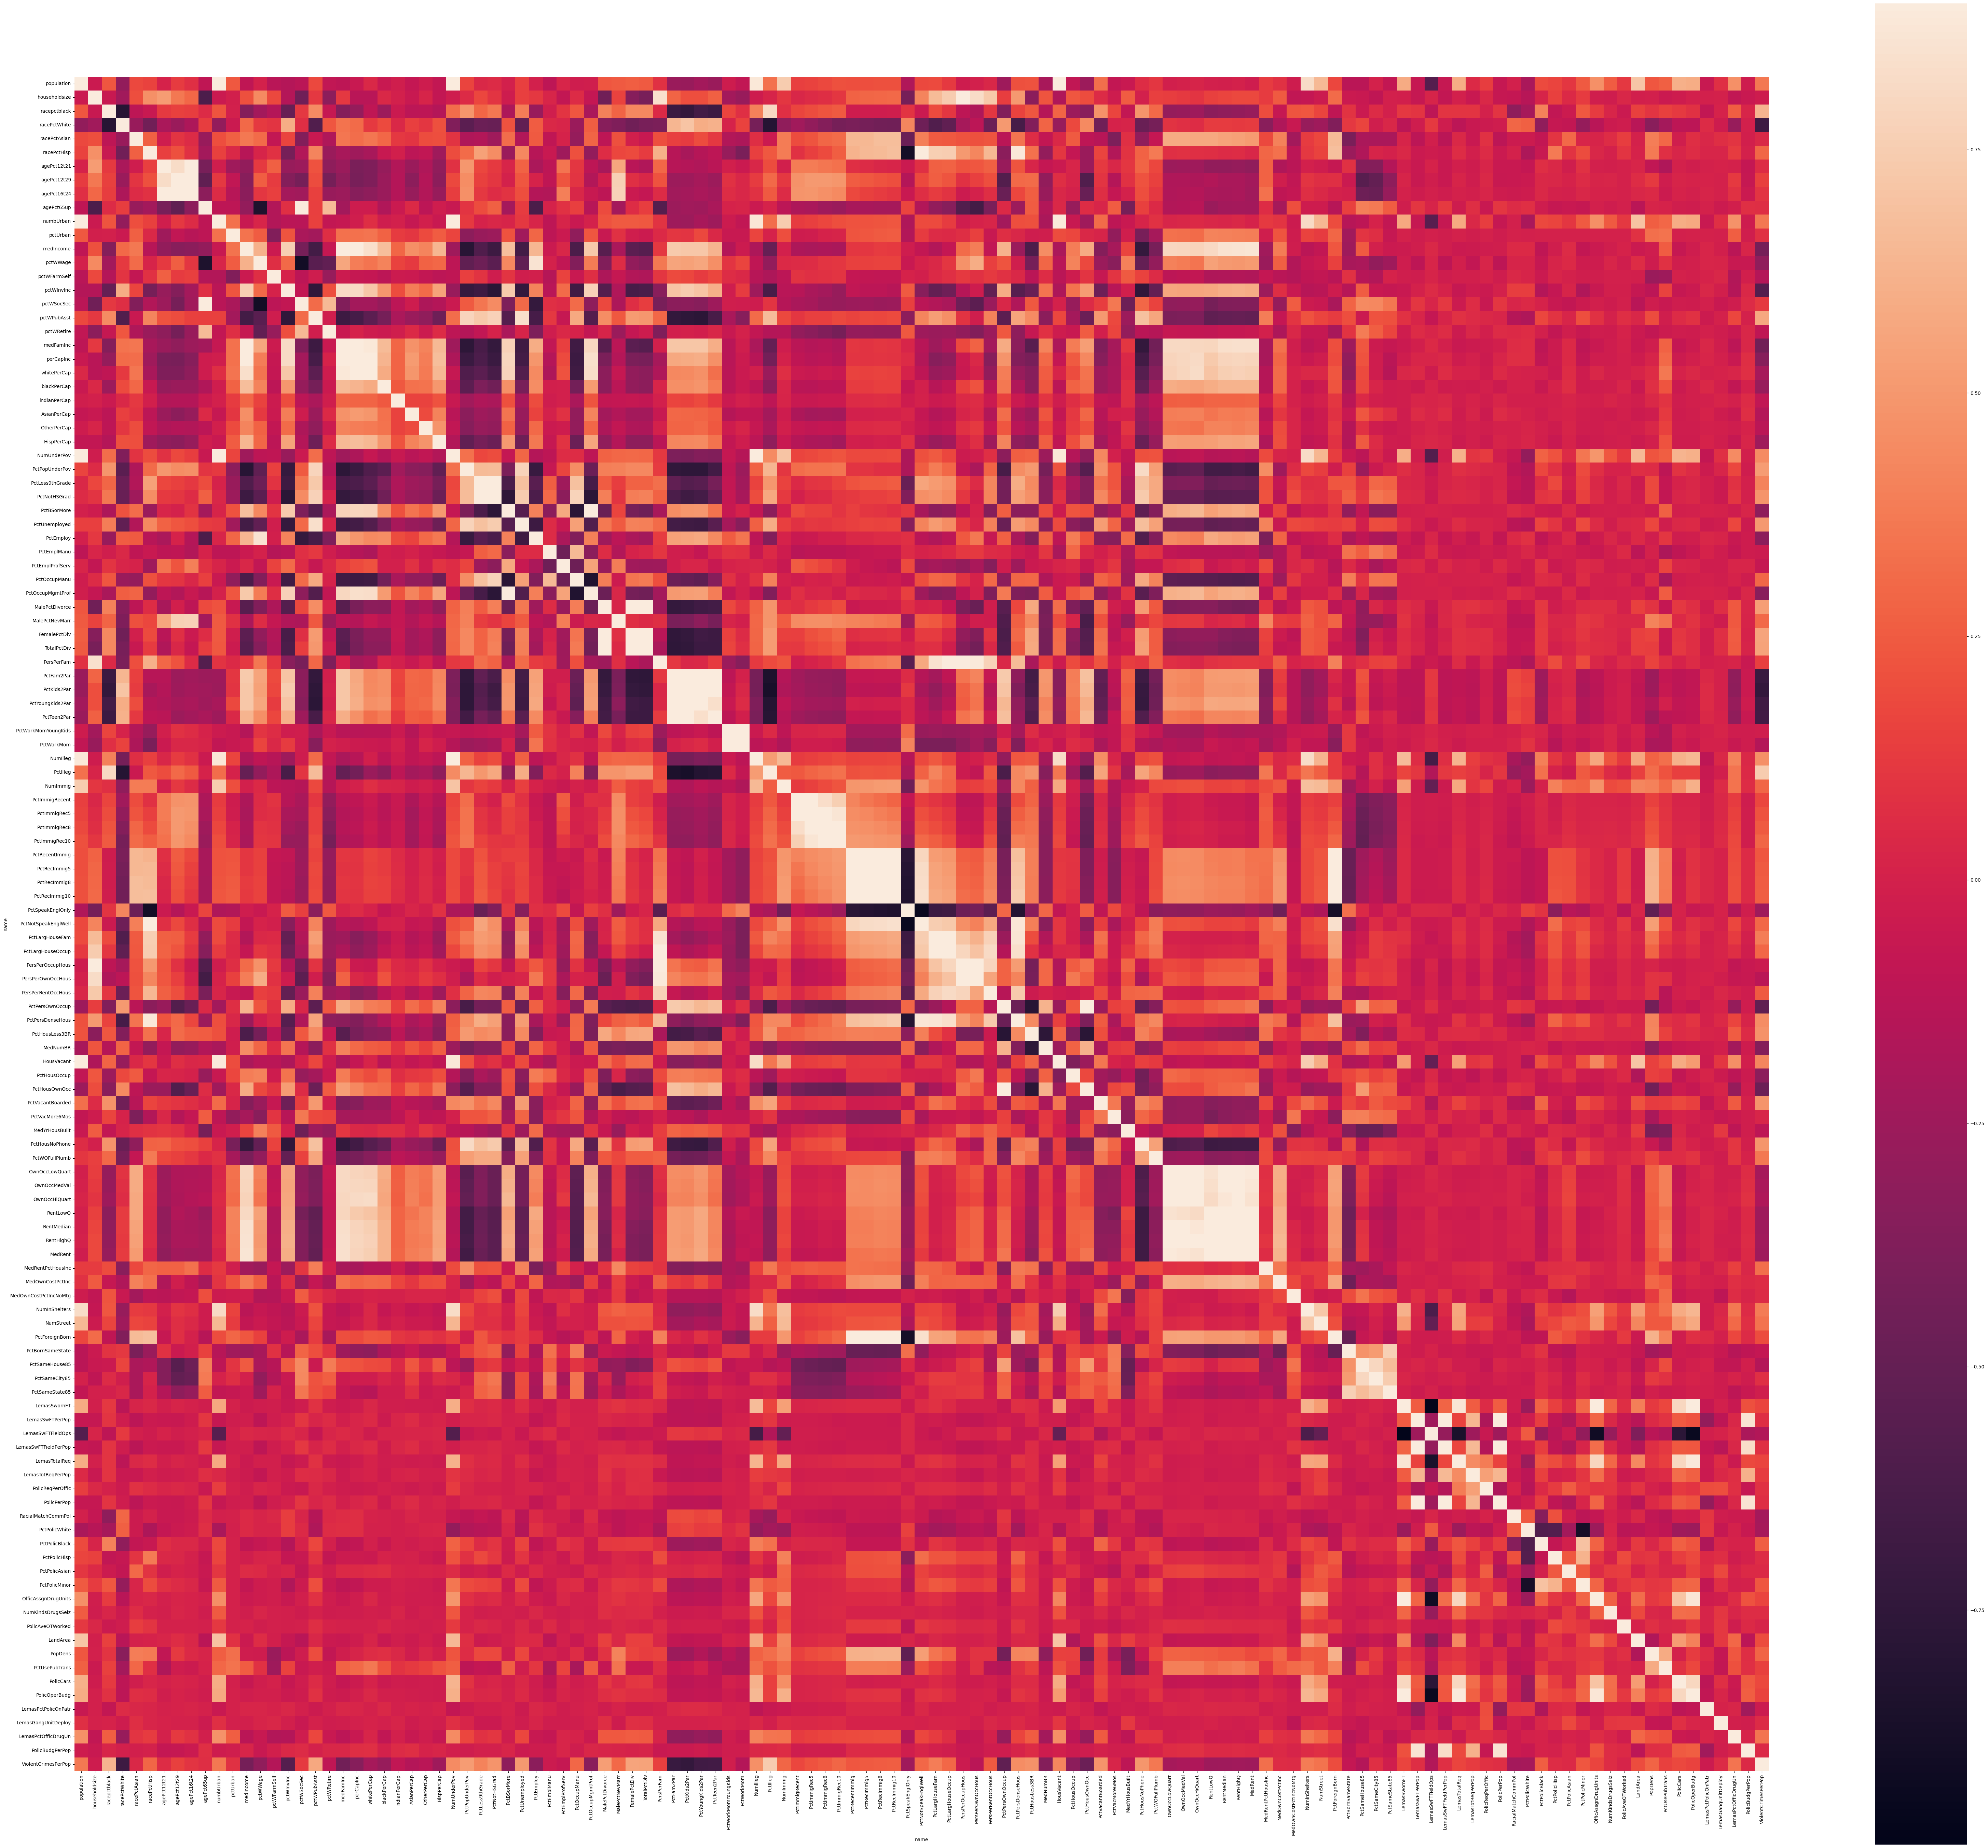

In [ ]:
# Seeing the correlation of the features with the target variable
corrmat = df_imputed.corr()
fig = plt.figure(figsize = (80, 70))


sns.heatmap(corrmat, vmax = .9, square = True)
plt.show()

In [ ]:
# Seeing the correlation of the features with target variable
corrmat

name,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
name,,,,,,,,,,,,,,,,,,,,,
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609147,0.595543,-0.061583,0.076527,0.466352,-0.035576,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032663,-0.007584,-0.006426,-0.000280,-0.094368,-0.054562,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.122017,0.083179,-0.082660,0.010987,0.260793,0.022237,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109191,-0.114860,0.052940,-0.033209,-0.276234,-0.006323,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.017992,0.067745,0.032389,0.065424,0.101888,-0.011619,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.061583,-0.006426,-0.082660,0.052940,0.032389,0.024366,0.000652,0.013327,0.013687,0.005601,...,-0.067678,0.055734,0.023457,-0.115349,-0.089736,1.000000,0.007179,0.021153,-0.237240,-0.039002
LemasGangUnitDeploy,0.076527,-0.000280,0.010987,-0.033209,0.065424,0.025956,0.011271,0.005145,-0.001001,-0.042756,...,0.109830,-0.076634,-0.082946,0.078436,0.023349,0.007179,1.000000,-0.015712,-0.021100,0.055038
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052426,-0.062677,0.021153,-0.015712,1.000000,0.018649,0.348627


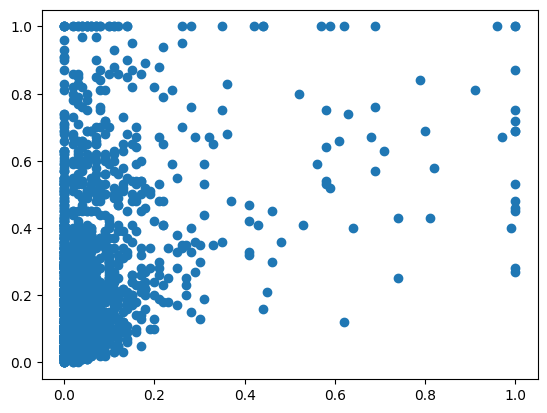

In [ ]:
# We will make a new feature numUrbanSq which is the square of numbUrban
df_imputed['numUrbanSq'] = df_imputed['numbUrban']**2

#plotting population and ViolentCrimesPerPop
plt.scatter(df_imputed['numbUrban'], df_imputed['ViolentCrimesPerPop'])

# We are doing this becasue we see that the relationship between the two is not linear
# NOTE: since we are using normalzed values within group comparisions are hard to do

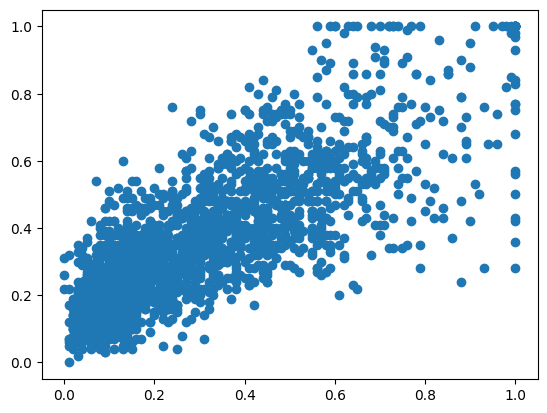

In [ ]:
# Interaction term between 'PctPopUnderPov' and 'PctUnemployed'
df_imputed['Pov_Unemp_Interaction'] = df_imputed['PctPopUnderPov'] * df_imputed['PctUnemployed']

# We will plot PctPopUnderPov and PctUnemployed
plt.scatter(df_imputed['PctPopUnderPov'], df_imputed['PctUnemployed'])

#Since they are reasonably highly correlated we can create an interaction term

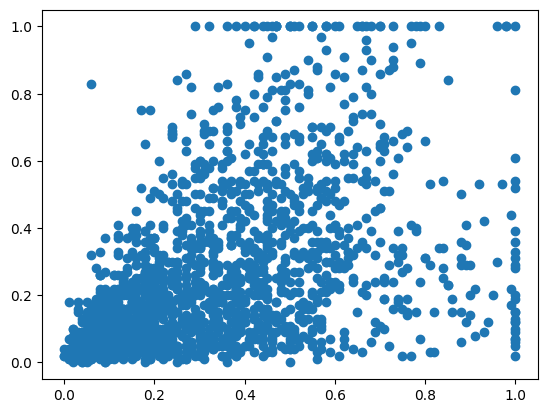

In [ ]:
# We will make a new feature pctUnderPovSq which is the square of PctPopUnderPov
df_imputed['pctUnderPovSq'] = df_imputed['PctPopUnderPov']**2

# Plotting PctPopUnderPov and ViolentCrimesPerPop
plt.scatter(df_imputed['PctPopUnderPov'], df_imputed['ViolentCrimesPerPop'])

#We see there is a large outlier of high poverty areas with lower violent crimes per population, thus we should model this non-linearly

In [ ]:
#DO NOT RUN THIS CELL UNLESS YOU LIKE GRAPHS
# Scatter plots for each feature against the target variable
for column in df_imputed.columns:
    if column != 'ViolentCrimesPerPop':
        plt.figure(figsize=(10, 6))
        plt.scatter(df_imputed[column], df_imputed['ViolentCrimesPerPop'])
        plt.xlabel(column)
        plt.ylabel('ViolentCrimesPerPop')
        plt.title(f'Scatter plot of {column} vs ViolentCrimesPerPop')
        plt.show()


#### 4.
Curate the processed data to the best of your abilities. Include graphs, plots, and descriptive
stats. Assume that your audience is highly technical and possesses domain knowledge.

In [22]:
#
df_imputed.describe()

name,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,0.059416,0.032874,0.796270,0.422491,0.094052,0.205281,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,0.104601,0.067547,0.210825,0.190458,0.240328,0.082684,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.072184,-0.116616,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,0.016249,0.005978,0.670000,0.332021,0.000000,0.160096,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,0.041136,0.026923,0.794570,0.433725,0.000000,0.202432,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,0.069944,0.049565,0.929736,0.504989,0.000000,0.241738,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.562747,1.000000,1.000000,1.000000,1.000000


### Task B: Regression Model Development and Evaluation


#### 1. 
Choose a model suitable for the dataset and task (remember: the initial goal is to predict
“ViolentCrimesPerPop”). Justify your selection based on the characteristics of the data and
your theoretical insights. Experiment with different model specifications. Choose one that is
best suited for your goal. Explain your selection in detail. (Tip: you might need to consider
including regularization functions.)




#### 2. 
Discreticize the target as you see fit (either binary or trichotomous). Justify your decision.
Fit at least two distinct classifiers. Choose the one that performs, in your opinion, best on
these data.




#### 3. 
Implement the selected regression and classification models, and perform any necessary hyper-
parameter tuning. Discuss the tuning process and its impact on model performance. Assess
your models’ overall performance.



#### 4. 
Evaluate the models using appropriate metrics, considering both their fit and the inverse
variance/bias relationship. Pick your overall favorite model. Discuss the trade-offs involved
and your ultimate model selection and preference.

### Task C: Methodological & Substantive Implications




#### 1. 
Now that the training and evaluation phase is complete, discuss the challenges you encoun-
tered during the first two Tasks. Are you overall satisfied with your final product? Justify
your answer.




#### 2. 
What are some key advantages and disadvantages of your approach?




#### 3. 
If you had the resources, how would you modify this study to the current sociopolitical
environment?




#### 4. 
How would you deploy or implement your model(s)? Any reservations or words of caution
regarding deployment? How should your model(s) be used in the context of your analysis?




#### 5. 
Offer your opinions on bias, ethical considerations, and algorithmic justice. What are some
of the pitfalls you identified while performing this study?

## Question 2 - Tezpur University Android Malware Dataset

For this question you will use the “Tezpur University Android Malware Dataset” dataset found at
the UCI repository (here). Your goal is to develop a model that best predicts the target feature
“Label”.
https://archive.ics.uci.edu/dataset/855/tuandromd+(tezpur+university+android+malware+dataset)

### Task A: Dataset Curation and Preprocessing



#### 1.
 Describe and implement preprocessing steps specific to this problem, including strategies
for handling imbalanced classes, encoding categorical variables, and any data transformation
techniques applied.


In [35]:
df2 = pd.read_csv("D:/Georgetown/25spring_semester/DS2/group assignment/tepzer university Android malware dataset/TUANDROMD.csv")

print("Basic information of the dataset:")
print(df2.info())

print("\n data preview:")
print(df2.head())

Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(241), object(1)
memory usage: 8.2+ MB
None

 data preview:
   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0

1. Dataset Overview
The dataset contains 4,465 samples and 242 features, where:

241 features are numerical (float64 type), representing different Android application permissions, API calls, or behaviors.
1 feature (Label) is categorical (object type), indicating whether the application is malware or benign.
Basic Analysis of the Dataset
Missing Values: Each column has exactly one missing value, meaning every feature and the Label column contains a single missing entry.
Feature Types: All features, except the Label, are numerical. No categorical encoding is needed for independent variables.
Class Distribution: The distribution of Label needs to be analyzed to determine if class imbalance is present.

2. Handling Missing Values
Since each column has only one missing value, we address this issue with the following approach:

Numerical Features: Missing values are replaced with the median value of each respective column to prevent distortion from outliers.
Target Variable (Label): The single missing label is dropped to ensure no ambiguity in classification.

3. Encoding the Target Variable (Label)
The Label column is categorical and must be converted into a numerical format. Since this is a binary classification problem (malware vs. benign), we apply Label Encoding:

"malware" → 1
"benign" → 0

4. Handling Class Imbalance
To check for class imbalance, we analyze the Label distribution. If the dataset is highly imbalanced, we apply Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class.

5. Data Transformation (Feature Scaling)
Since all features are numerical but may have different ranges, we apply Standardization using StandardScaler(). This transformation ensures that all features contribute equally to the model.


#### 2.
 Conduct exploratory data analysis (EDA) to uncover insights related to class distributions,
feature correlations, and potential predictors of interest (Tip: consider applying PCA). Sum-
marize key findings that could influence model selection and tuning.


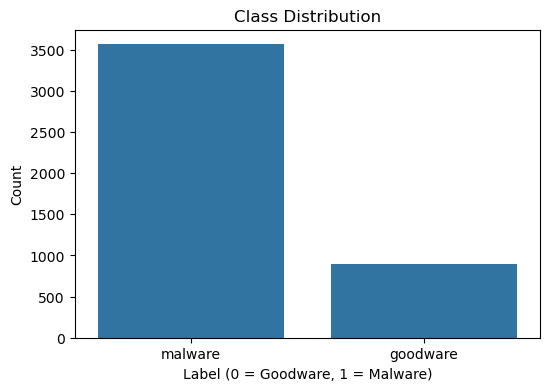

Label
malware     0.798611
goodware    0.201389
Name: proportion, dtype: float64


In [39]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df2["Label"])
plt.title("Class Distribution")
plt.xlabel("Label (0 = Goodware, 1 = Malware)")
plt.ylabel("Count")
plt.show()

# Print class counts
print(df2["Label"].value_counts(normalize=True))

Based on the class distribution plot and proportions:

Malware (malicious applications) constitute ~79.86% of the dataset.
Goodware (benign applications) account for only ~20.14%.
This indicates a severe class imbalance, as the dataset is heavily skewed toward malware instances.

To improve classification performance, we will apply SMOTE (Synthetic Minority Over-sampling Technique) to create additional synthetic goodware samples, ensuring a more balanced dataset before model training.

C:\Users\27311\AppData\Local\Temp\ipykernel_38060\3891282770.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["Label"] = df2["Label"].replace({'malware': 1, 'goodware': 0})


Class distribution after SMOTE: Counter({1: 3565, 0: 3565})


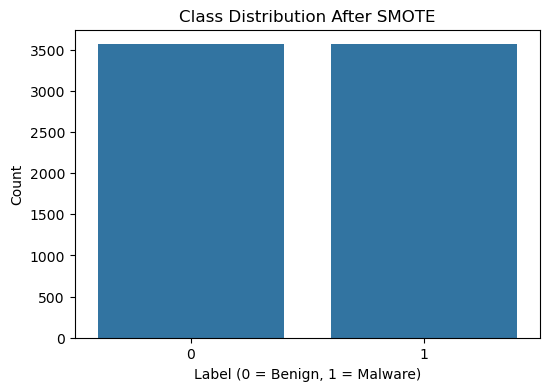

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Ensure 'Label' is a string (if needed)
df2["Label"] = df2["Label"].astype(str)

# Step 2: Replace categorical Labels with numerical values
df2["Label"] = df2["Label"].replace({'malware': 1, 'goodware': 0})

# Step 3: Drop any remaining NaN values (force removal)
df2 = df2.dropna(subset=["Label"])

# Step 4: Ensure 'Label' column does not contain any 'nan' as string
df2["Label"] = df2["Label"].replace('nan', 0)

# Step 5: Convert 'Label' to integer AFTER ensuring no NaN values
df2["Label"] = df2["Label"].astype(float).astype(int)

# **Define X and y (fixing missing part)**
X = df2.drop(columns=["Label"])  # Features (all columns except 'Label')
y = df2["Label"]  # Target variable

# Step 6: Ensure X has no NaN values before applying SMOTE
X = X.fillna(X.median())  # Fill NaNs with column median

# Step 7: Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 8: Check the new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

# Step 9: Visualize the new class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Label (0 = Benign, 1 = Malware)")
plt.ylabel("Count")
plt.show()


In [45]:
# just keep the numeric columns
df2_numeric = df2.select_dtypes(include=["number"])

# calculate the correlation matrix
correlation_matrix = df2_numeric.corr()

# get the top 20
top_corr_features = correlation_matrix["Label"].abs().sort_values(ascending=False)[1:21]

# print the results
print("Top 20 Features Most Correlated with Label:")
print(top_corr_features)


Top 20 Features Most Correlated with Label:
RECEIVE_BOOT_COMPLETED                                            0.760417
Ljava/net/URL;->openConnection                                    0.712211
Landroid/location/LocationManager;->getLastKgoodwarewnLocation    0.653875
GET_TASKS                                                         0.563214
Ljava/lang/System;->load                                          0.486265
WAKE_LOCK                                                         0.472105
Ljava/lang/System;->loadLibrary                                   0.470790
Ldalvik/system/DexClassLoader;->loadClass                         0.456847
KILL_BACKGROUND_PROCESSES                                         0.438312
Landroid/telephony/TelephonyManager;->getSimOperatorName          0.396342
Landroid/telephony/TelephonyManager;->getSimOperator              0.365909
Landroid/telephony/TelephonyManager;->getNetworkCountryIso        0.334256
Landroid/telephony/TelephonyManager;->getNetworkOperator

Based on the correlation analysis, we identified the top 20 features most strongly associated with the target variable Label (0 = Benign, 1 = Malware). These features exhibit a significant correlation with the classification of malware, providing insights into potential key predictors for model development.

Key Findings:
Highly Correlated Features:

The feature RECEIVE_BOOT_COMPLETED has the highest correlation with Label (0.76), suggesting that applications requesting permission to execute upon system boot are strongly linked to malware behavior.
Network-related operations such as Ljava/net/URL;->openConnection (0.71) and Landroid/location/LocationManager;->getLastKnownLocation (0.65) indicate that accessing URLs and retrieving device location data are highly correlated with malware presence.
Permissions and System Calls:

Several permissions related to system control, such as GET_TASKS (0.56) and WAKE_LOCK (0.47), show notable correlations. These permissions allow applications to retrieve running tasks and keep the device awake, behaviors commonly seen in malware.
The ability to load external code, represented by Ldalvik/system/DexClassLoader;->loadClass (0.45), is often exploited by malware to execute dynamic payloads.
Telephony and Device Information Access:

Multiple TelephonyManager methods, such as getSimOperatorName (0.39) and getNetworkCountryIso (0.33), are strongly correlated with malware. These features suggest that many malware applications attempt to access SIM card or network details, possibly for device tracking or unauthorized data collection.
Security-Sensitive Permissions:

The presence of KILL_BACKGROUND_PROCESSES (0.43) and SYSTEM_ALERT_WINDOW (0.28) highlights a common malware pattern of attempting to manipulate system processes or overlay windows for phishing attacks.
Location-based permissions, such as ACCESS_FINE_LOCATION (0.27) and ACCESS_COARSE_LOCATION (0.26), further reinforce the idea that malware often seeks to track user movements.aining and evaluation. 🚀


#### 3.
 Outline and justify a strategy for splitting the dataset into training, validation, and test sets,
considering any potential class imbalance and the dataset’s characteristics.


Dataset Splitting Strategy and Justification
Since we have already balanced the dataset using SMOTE (Synthetic Minority Over-sampling Technique), the class imbalance issue has been addressed before splitting. Given this, our focus shifts to ensuring that the data is properly divided for effective model training, validation, and evaluation.

1. Splitting Ratio
We will divide the dataset into three subsets:

Training Set (70%): Used to train the machine learning model.
Validation Set (15%): Used for hyperparameter tuning and model selection.
Test Set (15%): Used as a final evaluation set to measure model performance on unseen data.
This proportion ensures that the model has sufficient training data while keeping separate validation and test sets for unbiased evaluation.

2. Considerations After SMOTE
Since SMOTE generates synthetic samples for the minority class, we must ensure that:

SMOTE is applied only to the training set, not to validation or test sets. If applied globally, synthetic samples could leak into evaluation, leading to over-optimistic performance.
The validation and test sets retain their original distribution to reflect real-world scenarios.
Thus, the correct approach is:

First, split the original dataset into training (70%) and test (30%) sets before applying SMOTE.
Apply SMOTE only to the training set to balance the classes.
Split the test set into validation (50%) and test (50%), ensuring they remain untouched by SMOTE.

3. Justification of the Strategy
Prevents Data Leakage: Applying SMOTE only to the training set ensures that validation and test sets remain representative of real-world data.
Maintains Generalization Ability: The validation set is independent of training, ensuring reliable hyperparameter tuning.
Ensures Unbiased Evaluation: The test set provides a final, unbiased measure of performance without synthetic data contamination.

## Dataset Splitting Strategy and Justification

To ensure a reliable model evaluation while addressing class imbalance, we used a **70%-15%-15% split**:
- **70% for training** to provide the model with enough data for learning.
- **15% for validation** to fine-tune hyperparameters and prevent overfitting.
- **15% for testing** to evaluate generalization performance.

### **1. Handling Class Imbalance**
The dataset was imbalanced, so we applied **SMOTE before splitting** to balance the classes.  
This prevents synthetic samples from leaking into the test set, ensuring a fair evaluation.

### **2. Stratified Sampling for Consistency**
We used **`stratify=y_resampled`** to maintain the original class distribution across all subsets,  
preventing over-representation of any class.

### **3. Two-Step Splitting Approach**
Instead of splitting all at once, we first divided the dataset into **70% training and 30% temporary**.  
The temporary set was then split evenly into **15% validation and 15% test**.  
This ensures a **maximized training set** while keeping validation and test sets balanced.

### **4. Verifying the Split**
We confirmed the split by:
- Checking **subset sizes** to ensure correct proportions.
- Examining **class distributions** to verify balance.
- Visualizing **histograms** to onfirm stratification. ✅



### Task B: Classification Techniques & Analysis



### 1.
 Choose two classification algorithms suitable for the dataset and task. Justify your selection
based on the characteristics of the dataset and the theoretical advantages of the algorithms.


In [60]:
# Split the dataset first
from sklearn.model_selection import train_test_split

# reload the original dataset
df_original = pd.read_csv("D:/Georgetown/25spring_semester/DS2/group assignment/tepzer university Android malware dataset/TUANDROMD.csv")  
df_original["Label"] = df_original["Label"].map({"goodware": 0, "malware": 1})  
df_original = df_original.dropna(subset=["Label"])

# split the dataset from the original data
df_train, df_non_train = train_test_split(
    df_original, test_size=0.3, stratify=df_original["Label"], random_state=42
)

# get X 和 y
X_train = df_train.drop(columns=["Label"])
y_train = df_train["Label"]

# apply SMOTE in data for training
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# split the untrained dataset
df_val, df_test = train_test_split(
    df_non_train, test_size=0.5, stratify=df_non_train["Label"], random_state=42
)

# get the X, y of validation set and test set
X_val, y_val = df_val.drop(columns=["Label"]), df_val["Label"]
X_test, y_test = df_test.drop(columns=["Label"]), df_test["Label"]

# print the dataset to make sure the spliting is right
print(f"Training set size (after SMOTE): {X_train_resampled.shape}, {y_train_resampled.shape}")
print(f"Validation set size: {X_val.shape}, {y_val.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")


Training set size (after SMOTE): (4990, 241), (4990,)
Validation set size: (670, 241), (670,)
Test set size: (670, 241), (670,)


In [64]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.2/124.9 MB 2.9 MB/s eta 0:00:44
   ---------------------------------------- 1.1/124.9 MB 9.7 MB/s eta 0:00:13
    --------------------------------------- 2.2/124.9 MB 14.2 MB/s eta 0:00:09
   - -------------------------------------- 3.6/124.9 MB 19.0 MB/s eta 0:00:07
   - -------------------------------------- 4.7/124.9 MB 21.3 MB/s eta 0:00:06
   - -------------------------------------- 5.8/124.9 MB 21.8 MB/s eta 0:00:06
   -- ------------------------------------- 6.9/124.9 MB 23.1 MB/s eta 0:00:06
   -- ------------------------------------- 8.1/124.9 MB 23.5 MB/s eta 0:00:05
   --- ------------------------------------ 9.4/124.9 MB 25.0 MB/s eta 0:00:05
   --- ------------------------------------ 10.7/124.9 MB 31.2 MB/s eta 0:00:04
   --- ------------------------------------ 11.4/124.9 MB 31

Justification for Choosing Random Forest and XGBoost


Our choice of Random Forest (RF) and XGBoost was based on the characteristics of our dataset rather than the general advantages of these models.

Our dataset has 241 features, which makes methods like k-Nearest Neighbors (kNN) impractical due to their high computational complexity in high-dimensional spaces. Similarly, logistic regression assumes a linear relationship between features and the target variable, which is unlikely to hold in a malware detection task where interactions between features may be complex. Naïve Bayes also relies on the assumption that features are conditionally independent, which is not appropriate for our dataset, as permissions and API calls in Android applications often have strong dependencies.

Given that our dataset is high-dimensional and likely contains complex interactions between features, tree-based ensemble methods were a natural choice. Decision trees and their ensemble versions are less sensitive to high-dimensional data and can automatically handle feature selection by focusing on the most relevant attributes. We opted for Random Forest because it provides robustness and interpretability, while XGBoost was chosen for its ability to capture intricate feature interactions through boosting, which often results in higher accuracy in structured data tasks.

Furthermore, since our dataset originally had class imbalance (which we addressed using SMOTE), we needed classifiers that could handle imbalanced data effectively. While both RF and XGBoost can work with imbalanced datasets, XGBoost allows additional tuning (e.g., adjusting class weights) if needed. These considerations led us to select Random Forest and XGBoost as the most appropriate models.

D:\soft\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Random Forest Classification Report:

              precision    recall  f1-score   support

         0.0     0.9708    0.9852    0.9779       135
         1.0     0.9962    0.9925    0.9944       535

    accuracy                         0.9910       670
   macro avg     0.9835    0.9889    0.9862       670
weighted avg     0.9911    0.9910    0.9911       670

AUC-ROC Score: 0.9989


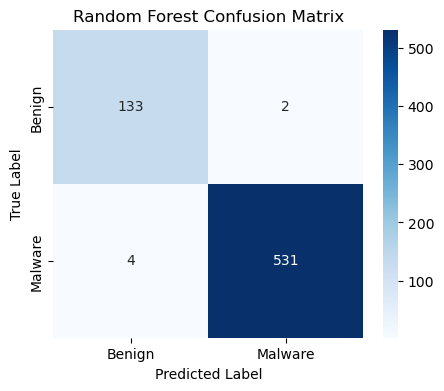


🔹 XGBoost Classification Report:

              precision    recall  f1-score   support

         0.0     0.9708    0.9852    0.9779       135
         1.0     0.9962    0.9925    0.9944       535

    accuracy                         0.9910       670
   macro avg     0.9835    0.9889    0.9862       670
weighted avg     0.9911    0.9910    0.9911       670

AUC-ROC Score: 0.9987


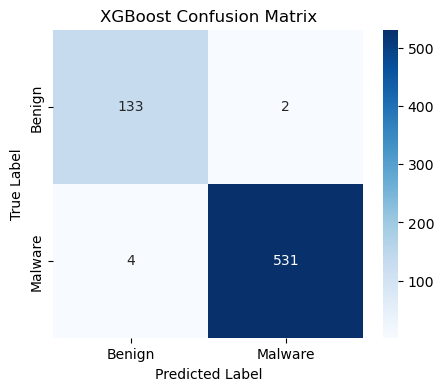

In [66]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# train by Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# train by XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# evaluate the models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # calculate the possibility of malware

    print(f"\n🔹 {model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, digits=4))

    # calculate the AUC-ROC
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC Score: {auc:.4f}")

    # draw the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# evaluate XGBoost
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


Evaluation of Model Performance:

Both models performed exceptionally well, achieving near-perfect classification results. Their precision, recall, and F1-score all exceeded 0.99, demonstrating their effectiveness in distinguishing between benign and malware applications. Additionally, both models achieved AUC-ROC scores above 0.998, indicating an extremely high ability to separate the two classes.

The confusion matrices show that:

Random Forest misclassified only 2 benign apps as malware and 4 malware apps as benign.

XGBoost produced the exact same number of misclassifications, suggesting that further hyperparameter tuning may be required to observe meaningful differences in performance.

Given these results, we observe that both models reached a performance ceiling, likely due to the dataset being well-structured and containing strong predictive signals. The similarity in their performance suggests that for this specific dataset, Random Forest offers nearly identical predictive power to XGBoost while being computationally less expensive and more interpretable.


### 2.
 Experiment with different model specifications and complexity levels. For each model, con-
duct a thorough hyperparameter optimization process. Explain the reasons behind the 2
chosen models (one for each algorithm).



### 3.
 Evaluate the performance of each model on the test set using a set of metrics appropriate
for classification problems (e.g., precision, recall, F1-score, AUC-ROC). Provide a confusion
matrix. Discuss the results and any discrepancies observed between the models. Discuss
whether your goal requires a metric-specific focus (e.g. recall over precision etc.) and detail
your steps to satisfying it.



### 4.
 Implement at least one technique for model interpretability. Discuss how this interpretability
aids in understanding the model’s decision-making process and its implications for the real-
world problem you’re addressing.1



### 5.
 Discuss your overall findings. Include a section on the challenges you encountered and the
steps you took to overcome those. How ready are your models for deployment?
